In [12]:
import yfinance as yf
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [2]:
def normalize_data(df):
    '''taken from https://tcoil.info/normalize-stock-prices-and-time-series-data-with-python-2/'''
    max_vals   = df.max()
    start_vals = df.iloc[0]
    #min_vals = df.min()
    
    normalized_df = (df - start_vals) / (max_vals - start_vals)
    return normalized_df

In [6]:
#Here add the tickers you want to compare
tickers = ['SPY', 'AMD', 'NVDA', 'AAPL', 'MU', 'PEP', 'SBUX', 'PG', 'PSA']

In [13]:
#Replace any date you want to start, as long as it is available in Yahoo Finance
df = yf.download(tickers=tickers, start="2017-06-17",)   # group_by='ticker')

[*********************100%***********************]  9 of 9 completed


In [14]:
df

Adj Close                                                 \
                  AAPL         AMD         MU        NVDA         PEP   
Date                                                                    
2017-06-19   34.684662   11.930000  31.123264   38.908276  102.651161   
2017-06-20   34.369438   12.640000  30.754173   38.851395  103.228783   
2017-06-21   34.573261   13.980000  31.931271   39.440018  102.764946   
2017-06-22   34.516380   14.380000  31.811567   39.167969  101.653450   
2017-06-23   34.670441   14.170000  31.651962   38.045135  102.362335   
...                ...         ...        ...         ...         ...   
2022-02-17  168.880005  112.370003  93.730003  245.070007  166.750000   
2022-02-18  167.300003  113.830002  90.800003  236.419998  167.710007   
2022-02-22  164.320007  115.650002  90.570000  233.899994  168.350006   
2022-02-23  160.070007  109.760002  87.309998  223.869995  166.690002   
2022-02-24  158.229996  110.654999  86.330002  224.637299  162.070007   

                                                                Close  ...  \
                    PG         PSA       SBUX         SPY        AAPL  ...   
Date                                                                   ...   
2017-06-19   78.726128  180.902985  55.481922  225.992264   36.584999  ...   
2017-06-20   78.524628  180.877380  54.534447  224.468170   36.252499  ...   
2017-06-21   78.323143  181.347183  54.625538  224.412766   36.467499  ...   
2017-06-22   77.998985  180.390442  54.215580  224.311127   36.407501  ...   
2017-06-23   78.340652  182.039047  54.488892  224.579056   36.570000  ...   
...                ...         ...        ...         ...         ...  ...   
2022-02-17  159.820007  346.059998  93.050003  437.059998  168.880005  ...   
2022-02-18  159.899994  343.559998  93.339996  434.230011  167.300003  ...   
2022-02-22  157.929993  342.380005  93.110001  429.570007  164.320007  ...   
2022-02-23  155.960007  353.450012  89.650002  421.950012  160.070007  ...   
2022-02-24  151.770493  346.484985  89.139999  418.540009  158.229996  ...   

                  Open     Volume                                           \
                   SPY       AAPL        AMD        MU       NVDA      PEP   
Date                                                                         
2017-06-19  243.589996  130165600   61803600  24915000   77817600  2436600   
2017-06-20  244.250000   99600400  118001500  25793300  109544400  3703500   
2017-06-21  243.460007   85063200  188796100  30579000   68265200  3767100   
2017-06-22  242.960007   76425200  149594200  23050800   46913200  3288100   
2017-06-23  242.910004  141757600  200777300  45323800  108858800  3453400   
...                ...        ...        ...       ...        ...      ...   
2022-02-17  443.220001   69589300   98179600  17943300   81059500  5156800   
2022-02-18  437.329987   82614200  114193900  19516000   75966400  5181600   
2022-02-22  431.890015   91162800  141648500  24825700   63342200  7733900   
2022-02-23  432.660004   89511200  120073500  19113900   56466000  5812800   
2022-02-24  411.019989   71956638   70946249   9829474   38251481  2803227   

                                                  
                 PG      PSA     SBUX        SPY  
Date                                              
2017-06-19  5246200   726600  6778000   65123800  
2017-06-20  5674200   937300  6985700   56906400  
2017-06-21  4164500   585900  6027600   55977600  
2017-06-22  4536700   631900  5602000   44148100  
2017-06-23  8782100   703800  6469500   66986800  
...             ...      ...      ...        ...  
2022-02-17  7925500   693400  6578200  102259100  
2022-02-18  8061600   681900  6208500  132454300  
2022-02-22  8179500   802300  8622500  124391800  
2022-02-23  6272500  1342100  9670700  132000000  
2022-02-24  4444052   406486  3728372   89862492  

[1181 rows x 54 columns]

In [15]:
df = df['Close']
df

,AAPL,AMD,MU,NVDA,PEP,PG,PSA,SBUX,SPY
Date,,,,,,,,,
2017-06-19,36.584999,11.930000,31.200001,39.330002,117.290001,89.860001,211.779999,60.900002,244.660004
2017-06-20,36.252499,12.640000,30.830000,39.272499,117.949997,89.629997,211.750000,59.860001,243.009995
2017-06-21,36.467499,13.980000,32.009998,39.867500,117.419998,89.400002,212.300003,59.959999,242.949997
2017-06-22,36.407501,14.380000,31.889999,39.592499,116.150002,89.029999,211.179993,59.509998,242.839996
2017-06-23,36.570000,14.170000,31.730000,38.457500,116.959999,89.419998,213.110001,59.810001,243.130005
...,...,...,...,...,...,...,...,...,...
2022-02-17,168.880005,112.370003,93.730003,245.070007,166.750000,159.820007,346.059998,93.050003,437.059998
2022-02-18,167.300003,113.830002,90.800003,236.419998,167.710007,159.899994,343.559998,93.339996,434.230011
2022-02-22,164.320007,115.650002,90.570000,233.899994,168.350006,157.929993,342.380005,93.110001,429.570007


```py
for ticker in tickers:
    individual_normalized = normalize_data(df[ticker])
    df[ticker] = individual_normalized
```

```py
#normalized_df[['SPY', 'AMD', 'SBUX']].plot(figsize=(20,10))
df.plot(figsize=(20,10))
```

In [16]:
## Set up initial investment per stock
init_investment = 100
num_shares = {}
for ticker in tickers:
    num_shares[ticker] = init_investment / df[ticker].iat[0]

In [17]:
num_shares

{'SPY': 0.40873047700148896,
 'AMD': 8.38222945867113,
 'NVDA': 2.5425882365721306,
 'AAPL': 2.7333607353414378,
 'MU': 3.205128126752606,
 'PEP': 0.8525875967212272,
 'SBUX': 1.6420360836527386,
 'PG': 1.112842191417483,
 'PSA': 0.47218812246860664}

In [19]:
performance_df = pd.DataFrame(columns=tickers,)
for ticker in tickers:
    performance_df[ticker] = df[ticker] * num_shares[ticker]
    

In [20]:
performance_df

,SPY,AMD,NVDA,AAPL,MU,PEP,SBUX,PG,PSA
Date,,,,,,,,,
2017-06-19,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-06-20,99.325591,105.951383,99.853794,99.091156,98.814100,100.562704,98.292281,99.744043,99.985835
2017-06-21,99.301068,117.183564,101.366637,99.678829,102.596146,100.110834,98.456482,99.488094,100.245540
2017-06-22,99.256108,120.536461,100.667422,99.514834,102.211534,99.028051,97.717565,99.076339,99.716684
2017-06-23,99.374643,118.776192,97.781588,99.959001,101.698714,99.718645,98.210180,99.510347,100.628011
...,...,...,...,...,...,...,...,...,...
2022-02-17,178.639741,941.911147,623.112118,461.609974,300.416670,142.168982,152.791463,177.854447,163.405421
2022-02-18,177.483040,954.149195,601.118706,457.291259,291.025644,142.987472,153.267642,177.943460,162.224950
2022-02-22,175.578354,969.404850,594.711373,449.145856,290.288453,143.533127,152.889981,175.751159,161.667772


<AxesSubplot:xlabel='Date'>

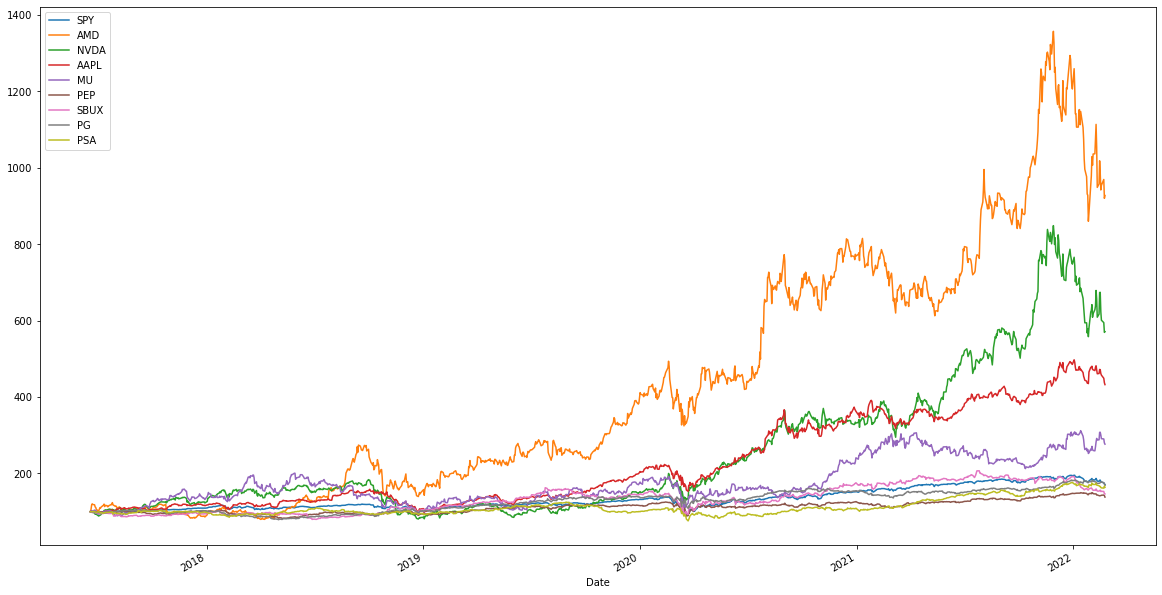

In [31]:
performance_df.plot(figsize=(20,11))

<AxesSubplot:xlabel='Date'>

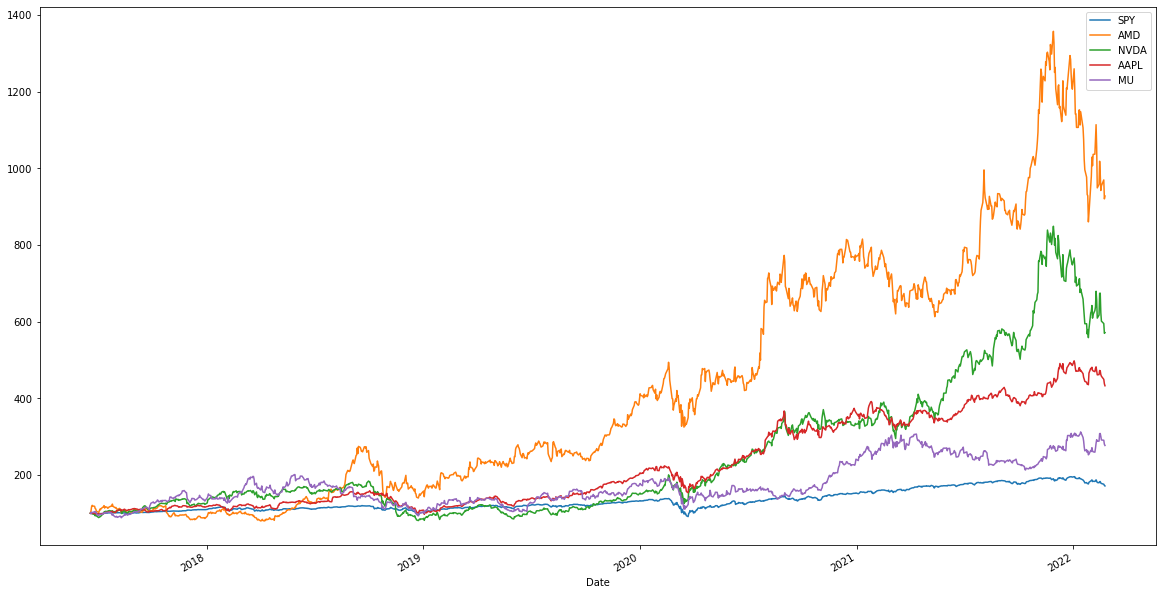

In [32]:
performance_df[['SPY','AMD','NVDA','AAPL','MU']].plot(figsize=(20,11))

<AxesSubplot:xlabel='Date'>

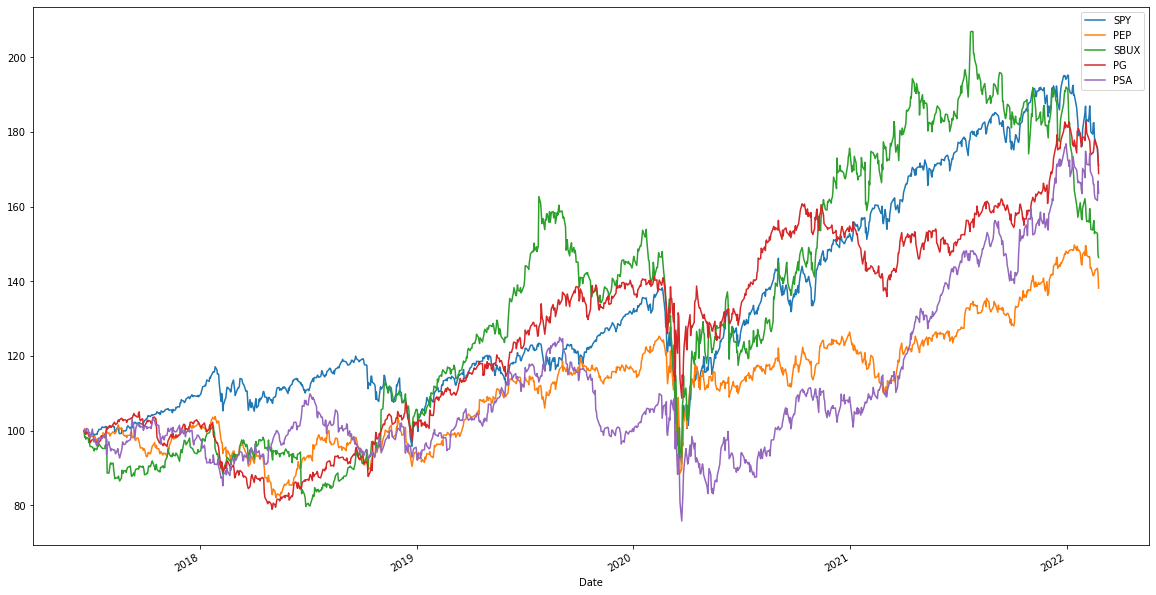

In [33]:
performance_df[['SPY','PEP','SBUX','PG','PSA']].plot(figsize=(20,11))